In [1]:
# import
from rdkit.Chem import AllChem as Chem
#from rdkit import Chem  # zde nema smysl, zahrnuto vyse
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors  # knihovna pro deskriptory
from rdkit.Chem import rdMolDescriptors as rdescriptors  # druha knihovna pro deskriptory

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\pslav\AppData\Local\Temp\ipykernel_12544\350626317.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# nacteni db - set1
drugbank = [mol for mol in Chem.SDMolSupplier('../data/drugbank.sdf') if mol]

[13:15:17] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[13:15:17] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[13:15:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:15:17] ERROR: Could not sanitize molecule ending on line 250947
[13:15:17] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:15:17] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:15:17] ERROR: Could not sanitize molecule ending on line 258130
[13:15:17] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:15:17] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:15:17] ERROR: Could not sanitize molecule ending on line 261581
[13:15:17] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:15:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[13:15:17] ERROR: Could not 

In [3]:
# nacteni pandas tabulky - set2
mtor = pd.read_csv('../data/chembl_mtor_ic50.csv', delimiter=';')

In [4]:
mtor

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1773577,NaN,0,443.49,0.0,3.65,40,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
1,CHEMBL1773561,NaN,0,390.47,0.0,4.60,24,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
2,CHEMBL1773077,NaN,0,406.47,0.0,4.30,25,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
3,CHEMBL1773580,NaN,0,443.49,0.0,3.65,43,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
4,CHEMBL1773578,NaN,0,457.51,0.0,3.68,41,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,CHEMBL4287809,NaN,0,426.43,0.0,2.71,14,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN
4592,CHEMBL4280265,NaN,0,448.84,0.0,3.49,27,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN
4593,CHEMBL4246563,NaN,0,407.43,0.0,4.92,16b,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4229497,1,Scientific Literature,Bioorg Med Chem,2018,NaN
4594,CHEMBL4244147,NaN,0,381.44,0.0,1.49,3c,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4229417,1,Scientific Literature,Bioorg Med Chem,2018,NaN


In [5]:
mtor_red = mtor[['Molecule ChEMBL ID', 'Smiles']]

In [6]:
mtor_red

,Molecule ChEMBL ID,Smiles
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...
...,...,...
4591,CHEMBL4287809,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...
4592,CHEMBL4280265,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...
4593,CHEMBL4246563,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...
4594,CHEMBL4244147,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO


In [7]:
mtor_red['Mol'] = mtor_red.apply(lambda row: Chem.MolFromSmiles(row[1]), axis=1)

In [8]:
mtor_red

,Molecule ChEMBL ID,Smiles,Mol
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...
...,...,...,...
4591,CHEMBL4287809,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...
4592,CHEMBL4280265,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...
4593,CHEMBL4246563,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...
4594,CHEMBL4244147,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...


In [9]:
mtor_red['Source'] = 'mtor'

In [10]:
mtor_red

,Molecule ChEMBL ID,Smiles,Mol,Source
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor
...,...,...,...,...
4591,CHEMBL4287809,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor
4592,CHEMBL4280265,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor
4593,CHEMBL4246563,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor
4594,CHEMBL4244147,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor


In [11]:
drugb = pd.DataFrame(drugbank, columns=['Mol'])

In [12]:
drugb['Smiles'] = drugb.apply(lambda row: Chem.MolToSmiles(row['Mol']), axis=1)

In [13]:
drugb['Source'] = 'drugbank'

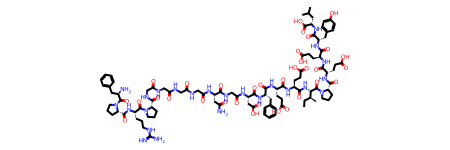

In [14]:
drugb['Mol'][0]

In [15]:
drugb['Molecule ChEMBL ID'] = drugb.apply(lambda row: row['Mol'].GetProp('DATABASE_ID'), axis=1)

In [16]:
drugb

,Mol,Smiles,Source,Molecule ChEMBL ID
0,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,drugbank,DB00006
1,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,drugbank,DB00014
2,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,drugbank,DB00035
3,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,drugbank,DB00050
4,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,drugbank,DB00091
...,...,...,...,...
7115,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,Oc1ccc(Cl)cc1,drugbank,DB13154
7116,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,drugbank,DB13155
7117,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,drugbank,DB13156
7118,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],drugbank,DB13157


In [17]:
drugb.rename({'Molecule ChEMBL ID':'ID'}, axis=1, inplace=True)

In [30]:
mtor_red.rename({'Molecule ChEMBL ID':'ID'}, axis=1, inplace=True)

In [18]:
drugb['MolWt'] = drugb.apply(lambda row: Descriptors.ExactMolWt(row['Mol']), axis=1)

In [19]:
mtor_red['MolWt'] = mtor_red.apply(lambda row: Descriptors.ExactMolWt(row['Mol']), axis=1)

In [20]:
drugb['NumAtoms'] = drugb.apply(lambda row: row['Mol'].GetNumAtoms(), axis=1)

In [21]:
mtor_red['NumAtoms'] = mtor_red.apply(lambda row: row['Mol'].GetNumAtoms(), axis=1)

In [22]:
drugb['LogP'] = drugb.apply(lambda row: Descriptors.MolLogP(row['Mol']), axis=1)

In [23]:
mtor_red['LogP'] = mtor_red.apply(lambda row: Descriptors.MolLogP(row['Mol']), axis=1)

In [24]:
drugb['NumHDonors'] = drugb.apply(lambda row: Descriptors.NumHDonors(row['Mol']), axis=1)

In [25]:
mtor_red['NumHDonors'] = mtor_red.apply(lambda row: Descriptors.NumHDonors(row['Mol']), axis=1)

In [26]:
drugb['NumHAcceptors'] = drugb.apply(lambda row: Descriptors.NumHAcceptors(row['Mol']), axis=1)

In [27]:
mtor_red['NumHAcceptors'] = mtor_red.apply(lambda row: Descriptors.NumHAcceptors(row['Mol']), axis=1)

In [28]:
drugb

,Mol,Smiles,Source,ID,MolWt,NumAtoms,LogP,NumHDonors,NumHAcceptors
0,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,drugbank,DB00006,2178.985813,155,-8.11643,28,29
1,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,drugbank,DB00014,1268.641439,91,-3.10570,17,16
2,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,drugbank,DB00035,1068.426955,74,-4.13203,14,15
3,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,drugbank,DB00050,1429.669818,102,-0.50613,17,16
4,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2B...,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,drugbank,DB00091,1201.841368,85,3.26900,5,12
...,...,...,...,...,...,...,...,...,...
7115,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,Oc1ccc(Cl)cc1,drugbank,DB13154,128.002892,8,2.04560,1,1
7116,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,drugbank,DB13155,340.079432,24,-1.32270,5,9
7117,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,drugbank,DB13156,1114.554641,79,1.54710,13,20
7118,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],drugbank,DB13157,330.147689,21,-0.00030,0,5


In [31]:
mtor_red

,ID,Smiles,Mol,Source,MolWt,NumAtoms,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,443.052210,30,3.65160,2,7
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,390.115047,28,4.59912,1,6
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,406.109961,29,4.29930,1,7
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,443.052210,30,3.65160,2,7
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,457.067860,31,3.67590,1,7
...,...,...,...,...,...,...,...,...,...
4591,CHEMBL4287809,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor,426.079804,30,2.70500,1,7
4592,CHEMBL4280265,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor,448.020845,30,3.48890,1,6
4593,CHEMBL4246563,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor,407.126991,31,4.92340,1,5
4594,CHEMBL4244147,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEC...,mtor,381.180090,28,1.48800,2,8


In [34]:
df = pd.concat([mtor_red, drugb], axis=0)

In [35]:
df

,ID,Smiles,Mol,Source,MolWt,NumAtoms,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,443.052210,30,3.65160,2,7
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,390.115047,28,4.59912,1,6
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,406.109961,29,4.29930,1,7
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,443.052210,30,3.65160,2,7
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,<rdkit.Chem.rdchem.Mol object at 0x000001E2FEB...,mtor,457.067860,31,3.67590,1,7
...,...,...,...,...,...,...,...,...,...
7115,DB13154,Oc1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,drugbank,128.002892,8,2.04560,1,1
7116,DB13155,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,drugbank,340.079432,24,-1.32270,5,9
7117,DB13156,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,drugbank,1114.554641,79,1.54710,13,20
7118,DB13157,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],<rdkit.Chem.rdchem.Mol object at 0x000001E2F2C...,drugbank,330.147689,21,-0.00030,0,5


In [42]:
df_melt = pd.melt(df, id_vars=['Source'], value_vars=['LogP', 'NumHDonors', 'NumHAcceptors'])
df_melt

,Source,variable,value
0,mtor,LogP,3.65160
1,mtor,LogP,4.59912
2,mtor,LogP,4.29930
3,mtor,LogP,3.65160
4,mtor,LogP,3.67590
...,...,...,...
35143,drugbank,NumHAcceptors,1.00000
35144,drugbank,NumHAcceptors,9.00000
35145,drugbank,NumHAcceptors,20.00000
35146,drugbank,NumHAcceptors,5.00000


<Axes: xlabel='Source', ylabel='NumAtoms'>

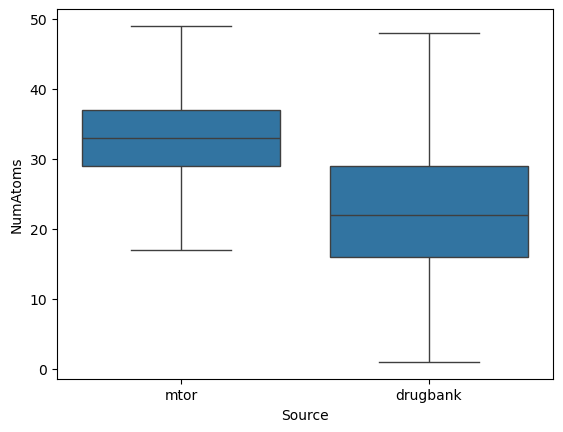

In [45]:
sns.boxplot(y='NumAtoms', x='Source', data=df, showfliers=False)

<Axes: xlabel='variable', ylabel='value'>

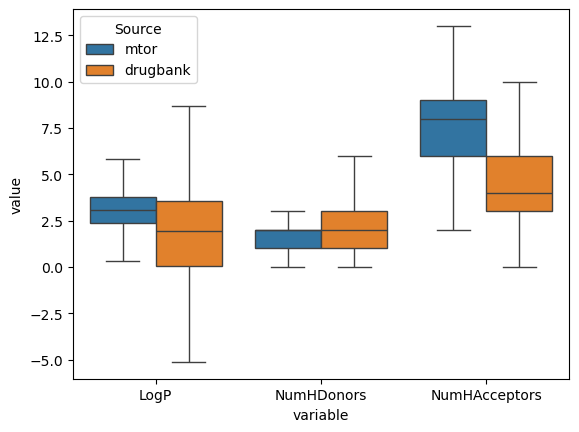

In [43]:
sns.boxplot(y='value', x='variable', hue='Source', data=df_melt, showfliers=False)

In [41]:
#sns.violinplot(y='value', x='variable', hue='Source', data=df_melt)